In [226]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

###  Data Exploration & Cleaning

In [227]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
print("Shape of df: ", df.shape)
display(df.head())

Shape of df:  (1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### Check Missing Values

In [228]:
df.isna().sum().to_frame().T

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There is no missing data

#### Some Info About Data

In [229]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

"Date" and "Time" can be expressed as a single column, and it is better to transfom their type to datetime64

In [231]:
# fix Date type "object" to "datetime64"
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.drop(columns=["Date", "Time"], inplace=True)
df.sort_values(by="Datetime", inplace=True)
#df.set_index("Datetime", inplace=True)

# Get some time data to better understanding
df["Hour"] = df["Datetime"].dt.hour
df["DayOfWeek"] = df["Datetime"].dt.dayofweek
df["Month"] = df["Datetime"].dt.month

display(df.dtypes.to_frame().T)
display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour,DayOfWeek,Month
0,object,object,object,object,object,object,float64,int64,float64,float64,object,float64,float64,float64,float64,datetime64[ns],int64,int64,int64


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour,DayOfWeek,Month
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,Credit card,435.66,4.761905,21.783,6.9,2019-01-01 10:39:00,10,1,1
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,Credit card,846.30,4.761905,42.315,9.0,2019-01-01 11:36:00,11,1,1
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,Ewallet,175.32,4.761905,8.766,5.0,2019-01-01 11:40:00,11,1,1
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,Cash,125.74,4.761905,6.287,5.0,2019-01-01 11:43:00,11,1,1
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,Cash,591.66,4.761905,29.583,7.7,2019-01-01 13:55:00,13,1,1


In [232]:
df.nunique().to_frame().T

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour,DayOfWeek,Month
0,1000,3,3,2,2,6,943,10,990,990,3,990,1,990,61,994,11,7,3


### Analysis

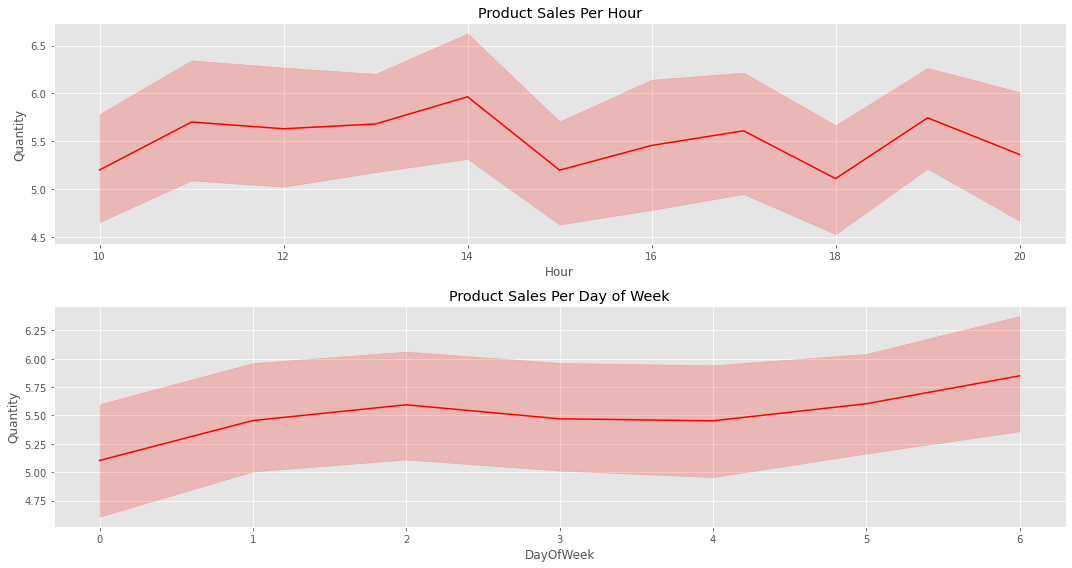

In [233]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
sns.lineplot(data=df, x="Hour",  y="Quantity", color="r", ax=ax[0])
ax[0].set_title("Product Sales Per Hour")

sns.lineplot(data=df, x="DayOfWeek",  y="Quantity", color="r", ax=ax[1])
ax[1].set_title("Product Sales Per Day of Week")

plt.tight_layout()

- Most of the item were sold around 14:00
- Most of the item were sold in Sunday

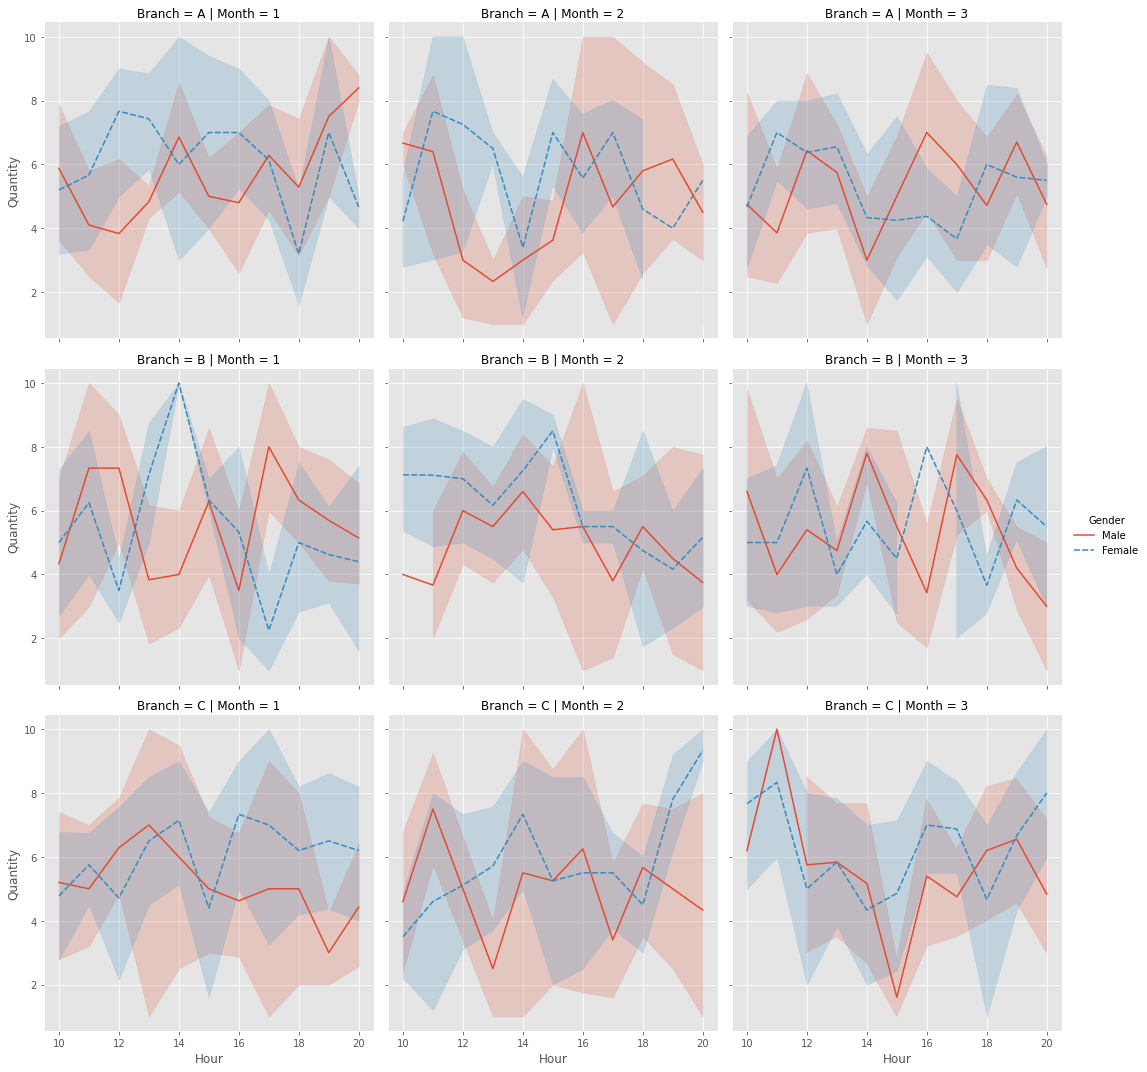

In [236]:
sns.relplot(data=df, x="Hour",  y="Quantity", col="Month", row="Branch", kind="line", hue="Gender", style="Gender")

- It can be seen that how each branch's sales quantity looks like by the hour in a monthly fashion according to gender

### Analysis

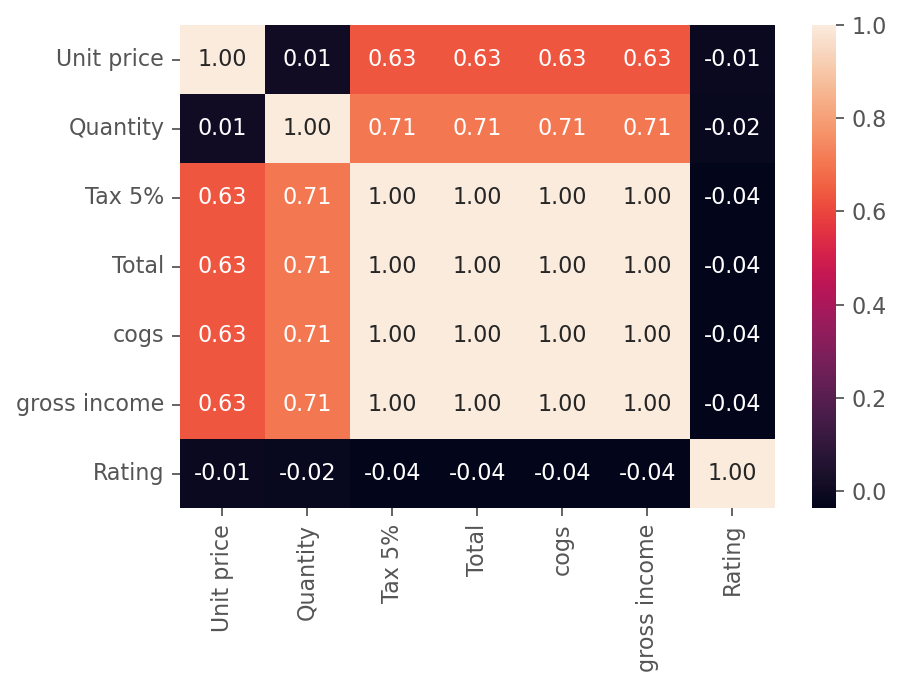

In [178]:
plt.figure(dpi=160)
sns.heatmap(df.drop(columns=["gross margin percentage"]).corr(),annot=True, fmt=".2f")
plt.show()

- Except "Rating", other parameters are highly correlated.

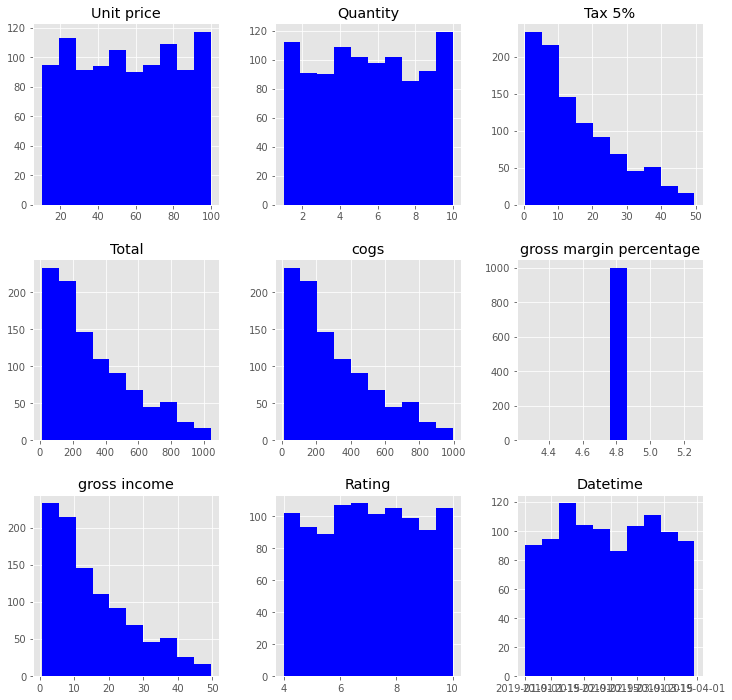

In [179]:
df.hist(figsize=(12,12), color="Blue");

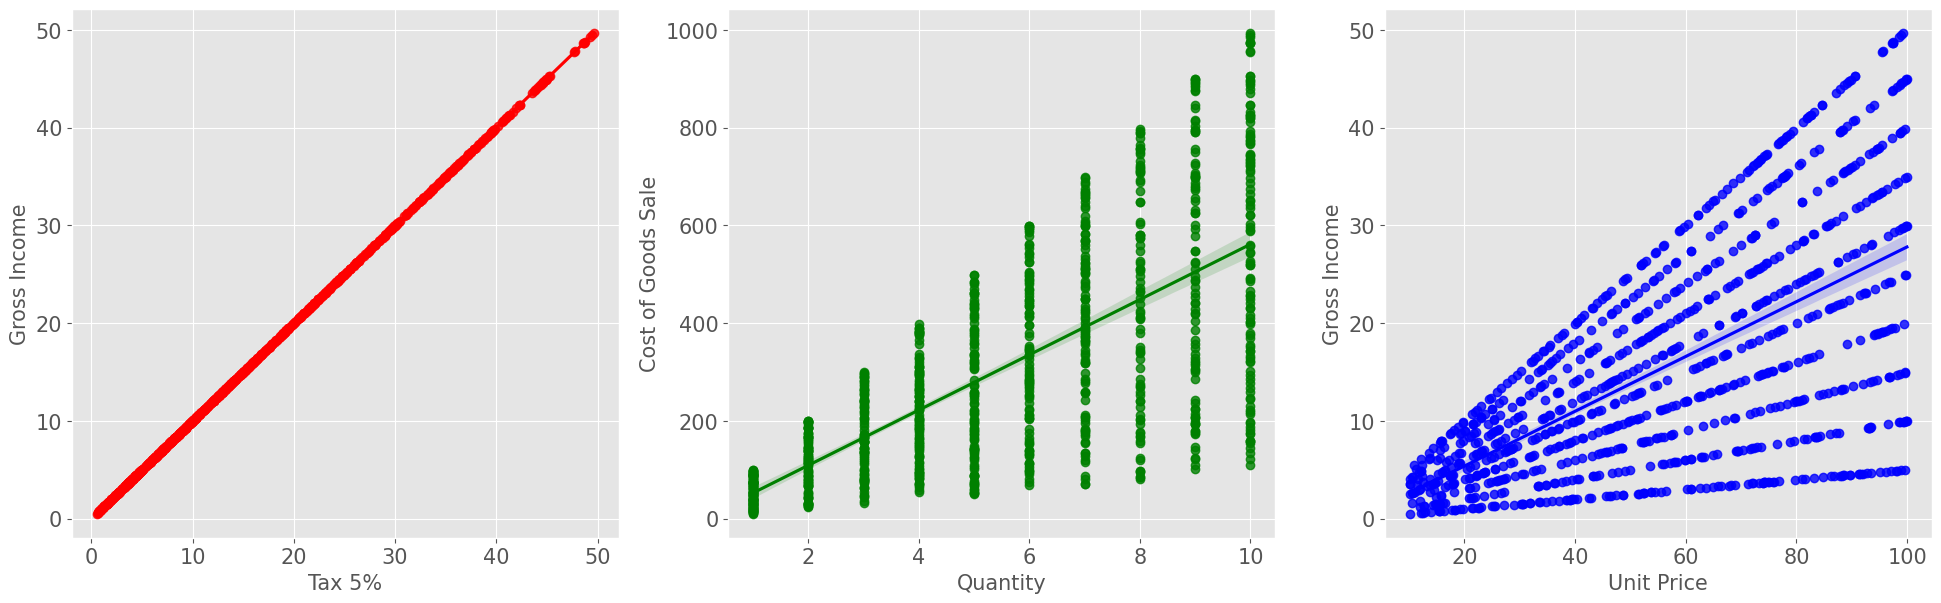

In [180]:
fig, ax = plt.subplots(1, 3, figsize=(24,7), dpi=100)

fontsize = 15

sns.regplot(data=df, x="Tax 5%", y="gross income", color="r", ax=ax[0])
ax[0].set_xlabel("Tax 5%", fontsize=fontsize)
ax[0].set_ylabel("Gross Income", fontsize=fontsize)
ax[0].tick_params(axis="both", labelsize=fontsize)

sns.regplot(data=df, x="Quantity", y="cogs", color="g", ax=ax[1])
ax[1].set_xlabel("Quantity", fontsize=fontsize)
ax[1].set_ylabel("Cost of Goods Sale", fontsize=fontsize)
ax[1].tick_params(axis="both", labelsize=fontsize)

sns.regplot(data=df, x="Unit price", y="gross income", color="b", ax=ax[2])
ax[2].set_xlabel("Unit Price", fontsize=fontsize)
ax[2].set_ylabel("Gross Income", fontsize=fontsize)
ax[2].tick_params(axis="both", labelsize=fontsize)

plt.show()

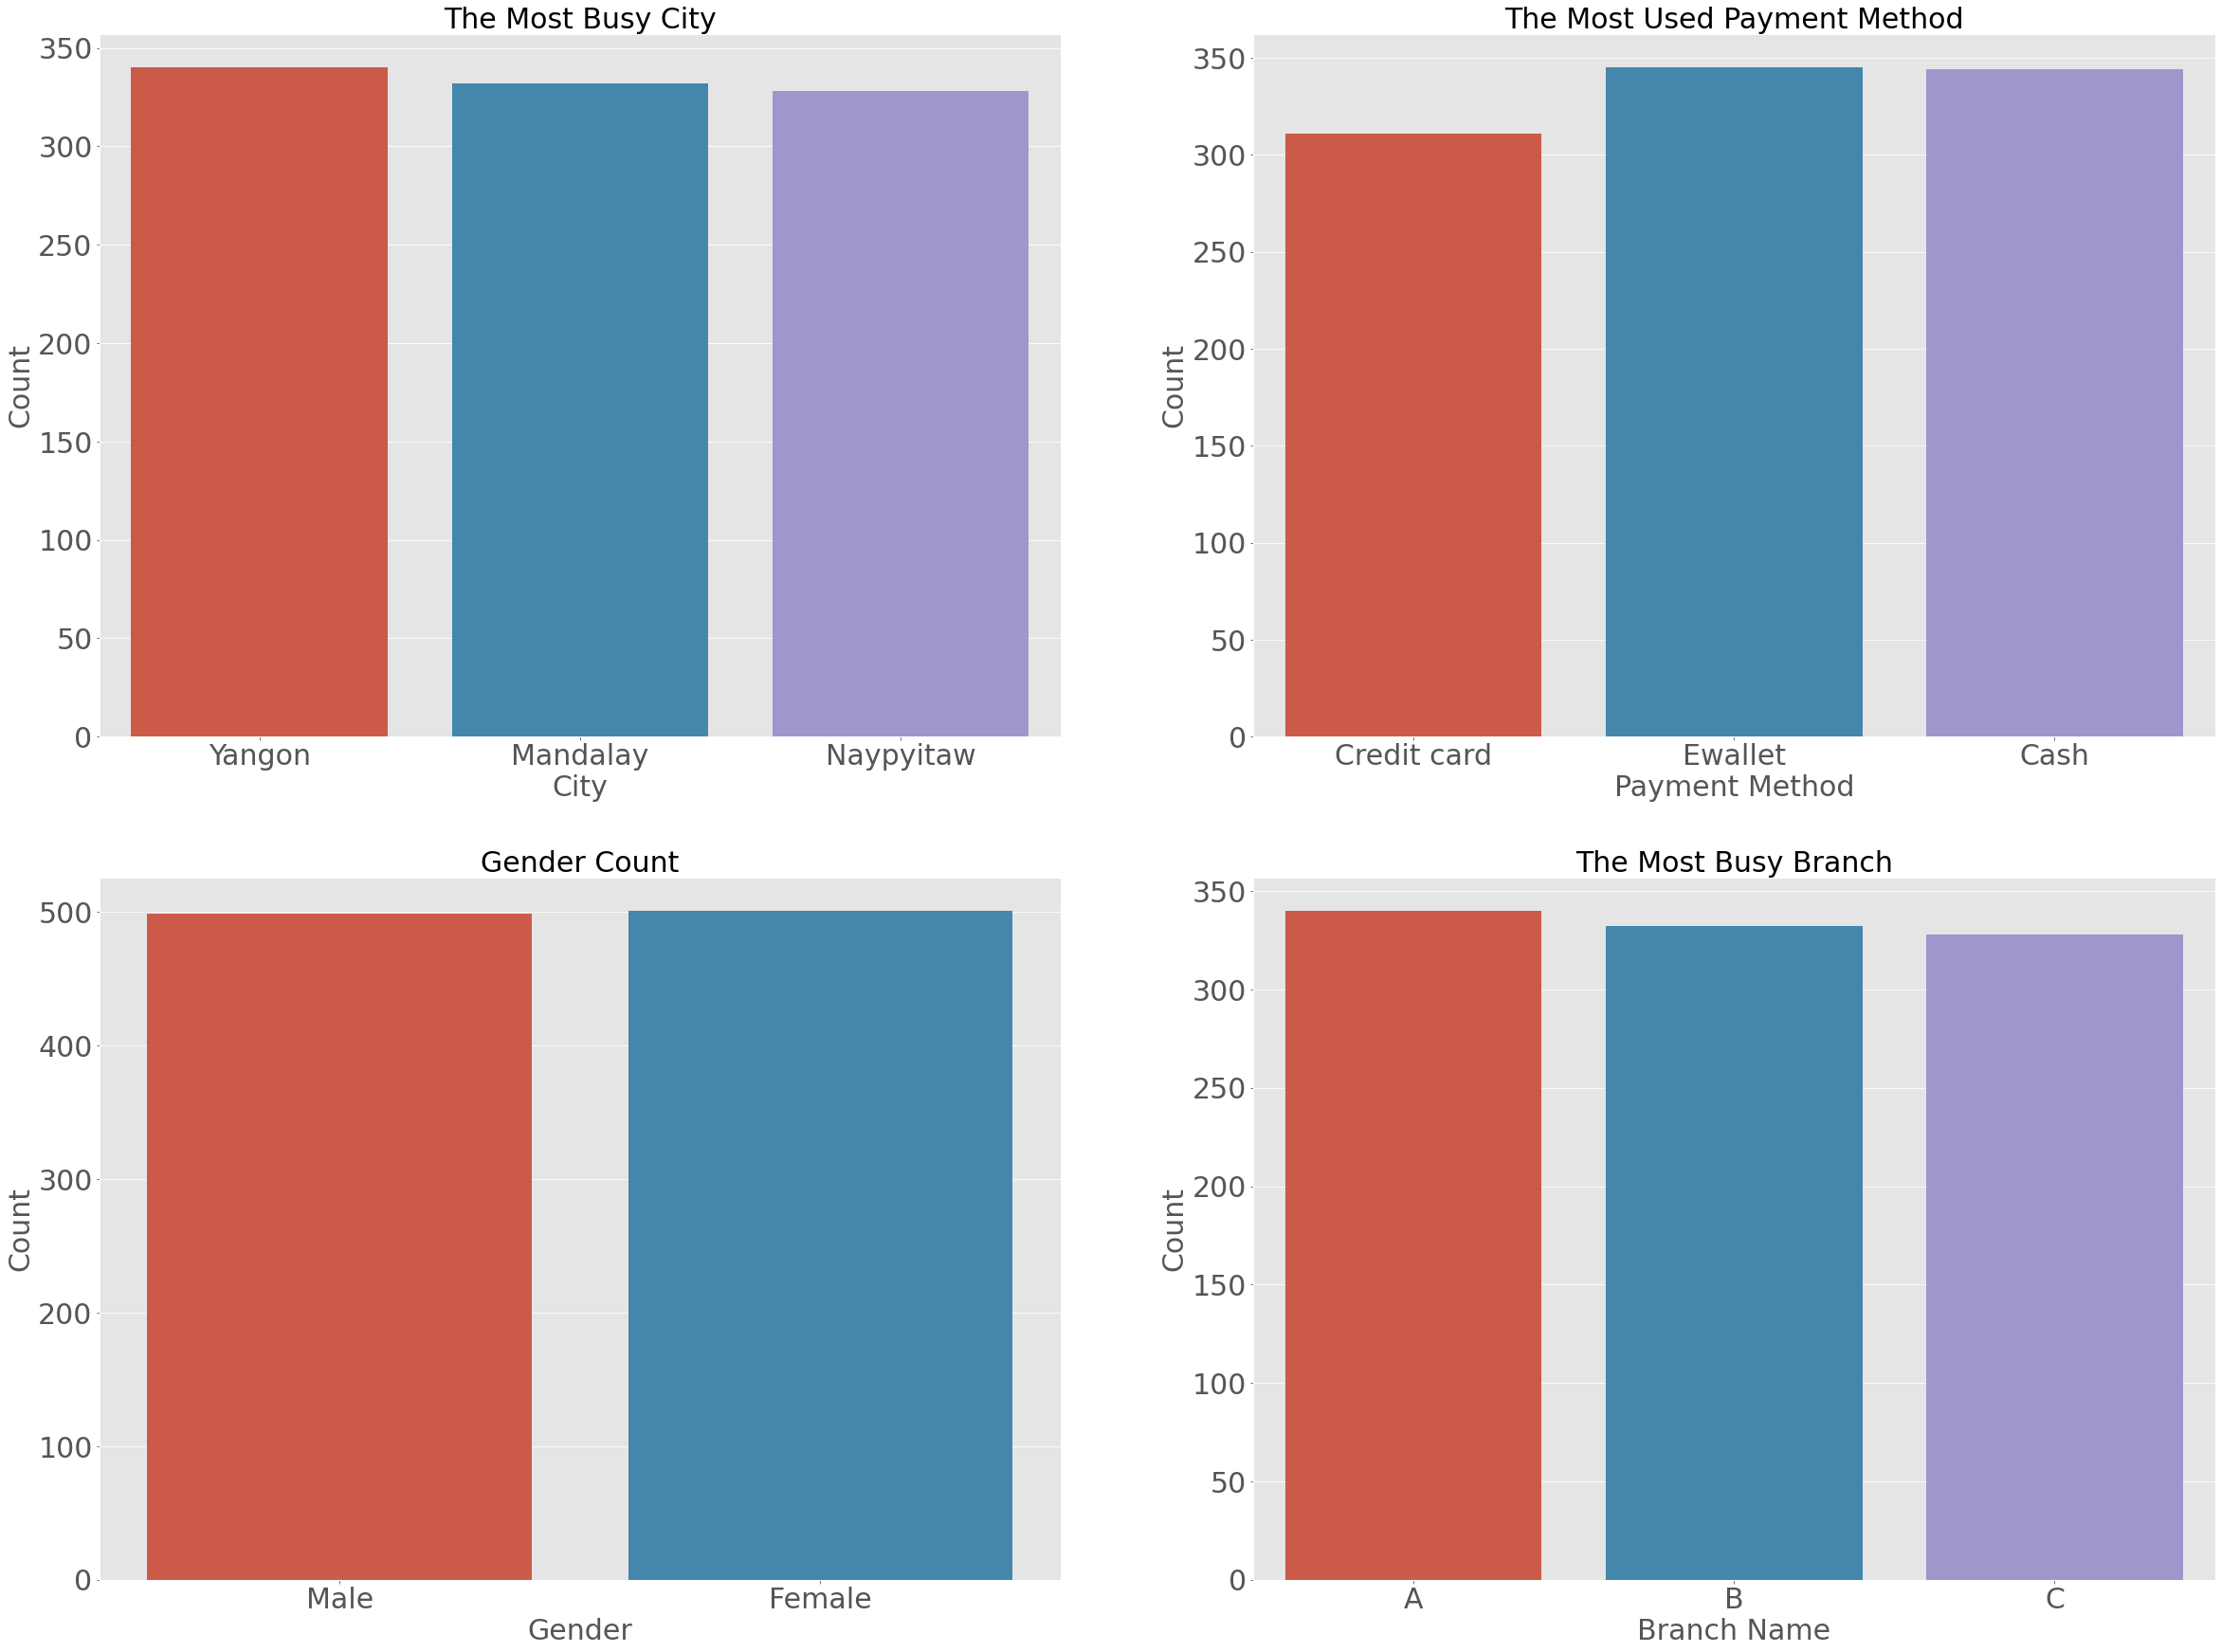

In [241]:
fig, ax = plt.subplots(2, 2, figsize=(40,30))
#sns.set(font_scale = 3)
fontsize=30

sns.countplot(df["City"], ax=ax[0,0])
ax[0,0].set_xlabel("City", fontsize=fontsize)
ax[0,0].set_ylabel("Count", fontsize=fontsize)
ax[0,0].set_title("The Most Busy City", fontsize=fontsize)
ax[0,0].tick_params(axis="both", labelsize=fontsize)

sns.countplot(df["Payment"], ax=ax[0,1])
ax[0,1].set_xlabel("Payment Method", fontsize=fontsize)
ax[0,1].set_ylabel("Count", fontsize=fontsize)
ax[0,1].set_title("The Most Used Payment Method", fontsize=fontsize)
ax[0,1].tick_params(axis="both", labelsize=fontsize)

sns.countplot(df["Gender"], ax=ax[1,0])
ax[1,0].set_xlabel("Gender", fontsize=fontsize)
ax[1,0].set_ylabel("Count", fontsize=fontsize)
ax[1,0].set_title("Gender Count", fontsize=fontsize)
ax[1,0].tick_params(axis="both", labelsize=fontsize)

sns.countplot(df["Branch"], ax=ax[1,1])
ax[1,1].set_xlabel("Branch Name", fontsize=fontsize)
ax[1,1].set_ylabel("Count", fontsize=fontsize)
ax[1,1].set_title("The Most Busy Branch", fontsize=fontsize)
ax[1,1].tick_params(axis="both", labelsize=fontsize)

In [193]:
display(df["City"].value_counts().to_frame().T)
display(df["Payment"].value_counts().to_frame().T)
display(df["Gender"].value_counts().to_frame().T)
display(df["Branch"].value_counts().to_frame().T)

,Yangon,Mandalay,Naypyitaw
City,340,332,328


,Ewallet,Cash,Credit card
Payment,345,344,311


,Female,Male
Gender,501,499


,A,B,C
Branch,340,332,328


- Yangon is the most busy city before Mandalay and Naypyitaw
- Credit card is the least used payment method. Most of the customers pay through the Ewallet and Cash Payment
- Gender is nearly equal
- A is the busiest branch

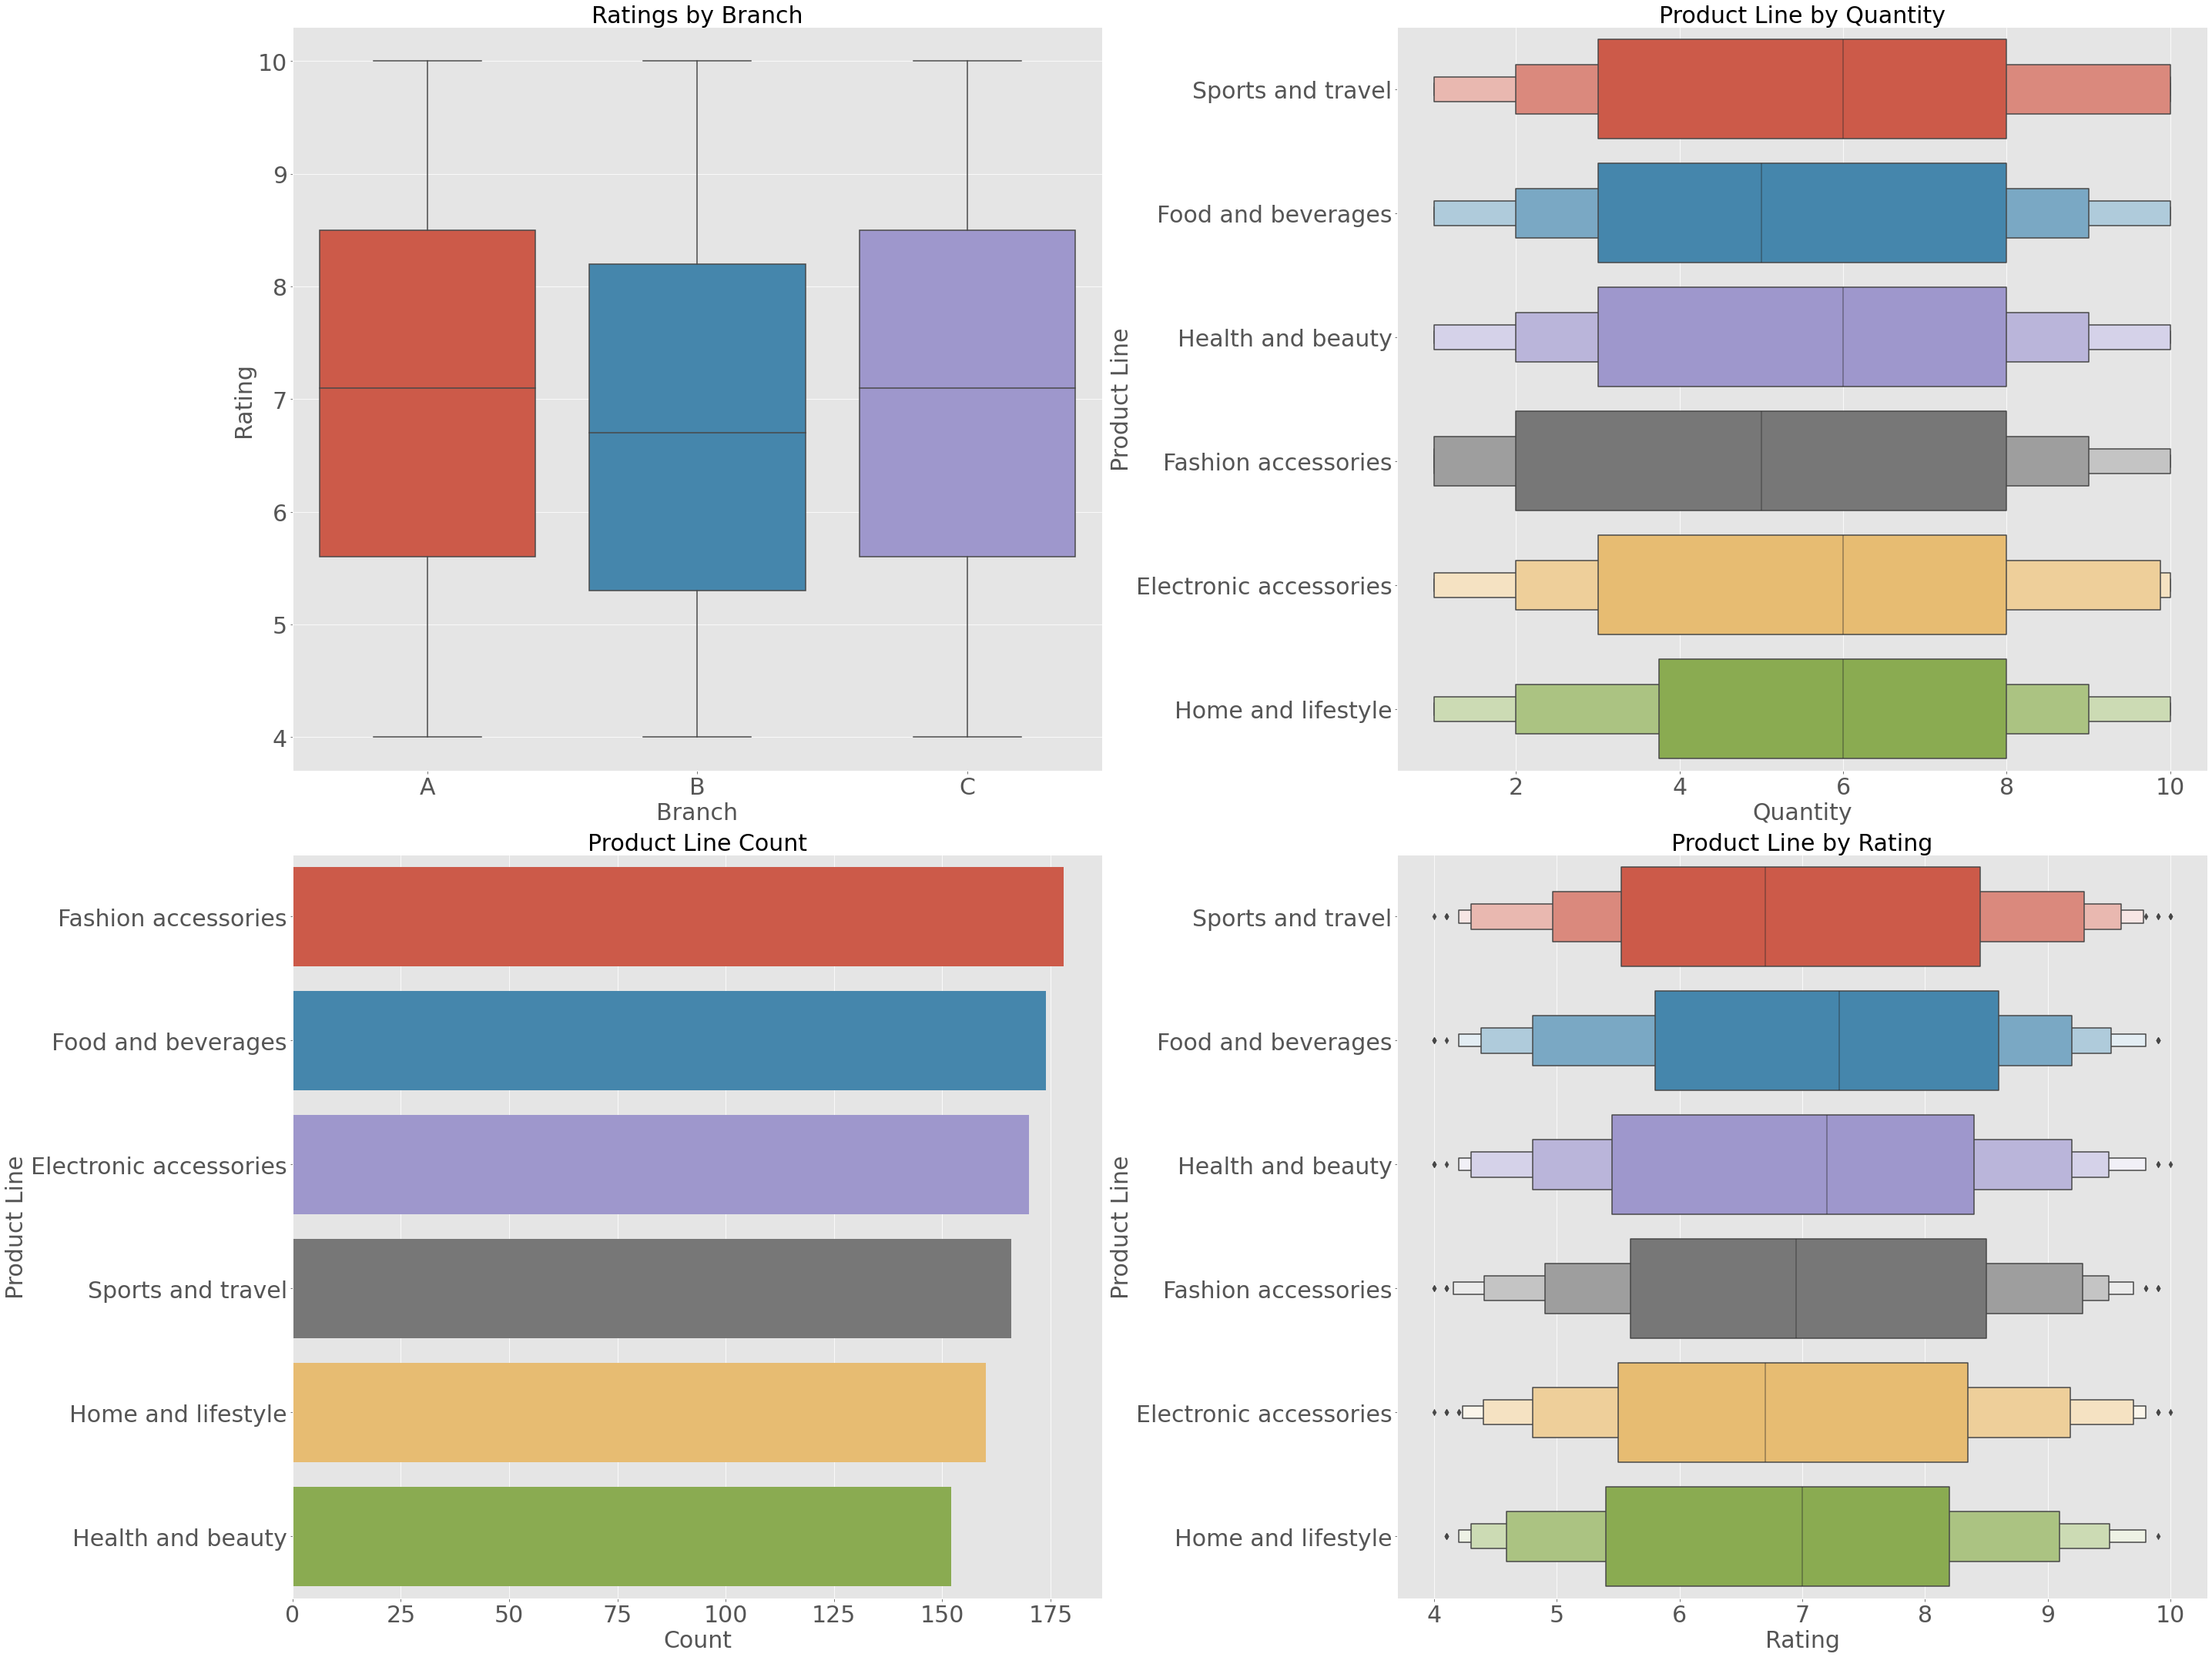

In [243]:
fig, ax = plt.subplots(2, 2, figsize=(40,30))
#sns.set(font_scale = 3)
fontsize=30

sns.boxplot(data=df, x="Branch", y="Rating", ax=ax[0,0])
ax[0,0].set_xlabel("Branch", fontsize=fontsize)
ax[0,0].set_ylabel("Rating", fontsize=fontsize)
ax[0,0].set_title("Ratings by Branch", fontsize=fontsize)
ax[0,0].tick_params(axis="both", labelsize=fontsize)

sns.boxenplot(data=df, y="Product line", x="Quantity", ax=ax[0,1])
ax[0,1].set_xlabel("Quantity", fontsize=fontsize)
ax[0,1].set_ylabel("Product Line", fontsize=fontsize)
ax[0,1].set_title("Product Line by Quantity", fontsize=fontsize)
ax[0,1].tick_params(axis="both", labelsize=fontsize)

sns.countplot(data=df, y="Product line", order=df["Product line"].value_counts().index, ax=ax[1,0])
ax[1,0].set_xlabel("Count", fontsize=fontsize)
ax[1,0].set_ylabel("Product Line", fontsize=fontsize)
ax[1,0].set_title("Product Line Count", fontsize=fontsize)
ax[1,0].tick_params(axis="both", labelsize=fontsize)

sns.boxenplot(data=df, y="Product line", x="Rating", ax=ax[1,1])
ax[1,1].set_xlabel("Rating", fontsize=fontsize)
ax[1,1].set_ylabel("Product Line", fontsize=fontsize)
ax[1,1].set_title("Product Line by Rating", fontsize=fontsize)
ax[1,1].tick_params(axis="both", labelsize=fontsize)

plt.tight_layout()

- Branch B has the lowest rating
- Health and Beauty, Electronic accessories , Home and lifestyle, Sports and travel have a better average quantity sales than food and beverages as well as Fashion accessories.
- Fashion Accessories is the highest sold while Health and beauty is the lowest sold items
- Food and Beverages have the highest average rating while sports and travel the lowest

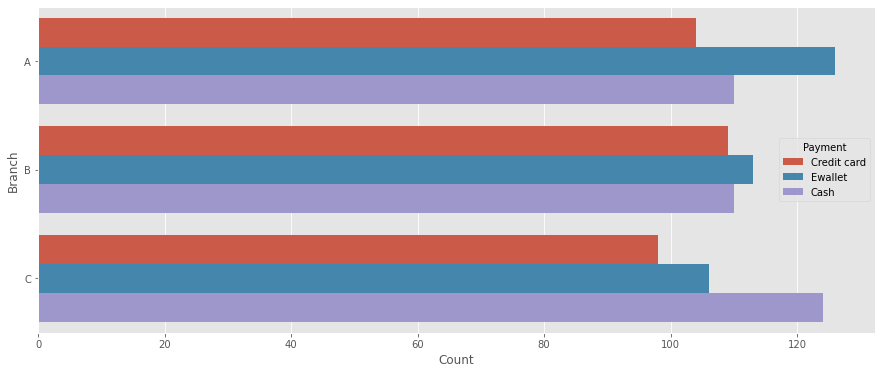

In [182]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=df, y="Branch", hue="Payment", ax=ax) 
plt.xlabel("Count")
plt.ylabel("Branch")
plt.show()

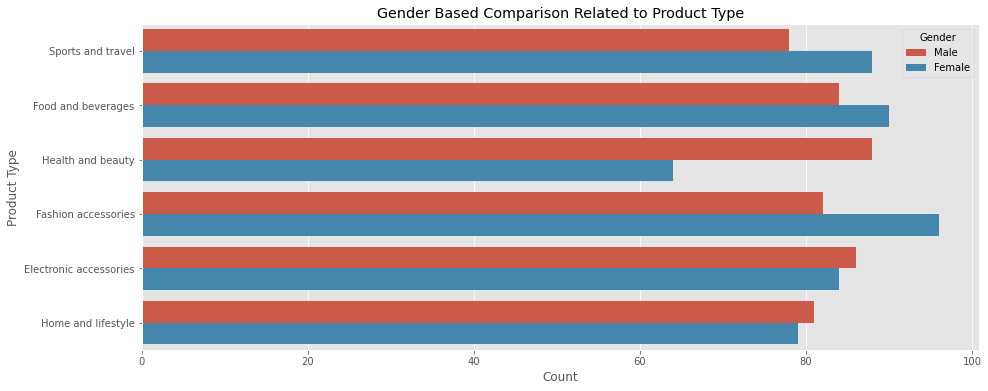

In [183]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=df, y ="Product line", hue = "Gender", ax=ax) 
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.title("Gender Based Comparison Related to Product Type")
plt.show()

- In Health & Beauty, Males are much more than Females whereas in Fashion accessories , Food and beverages and Sports and travel Females are more

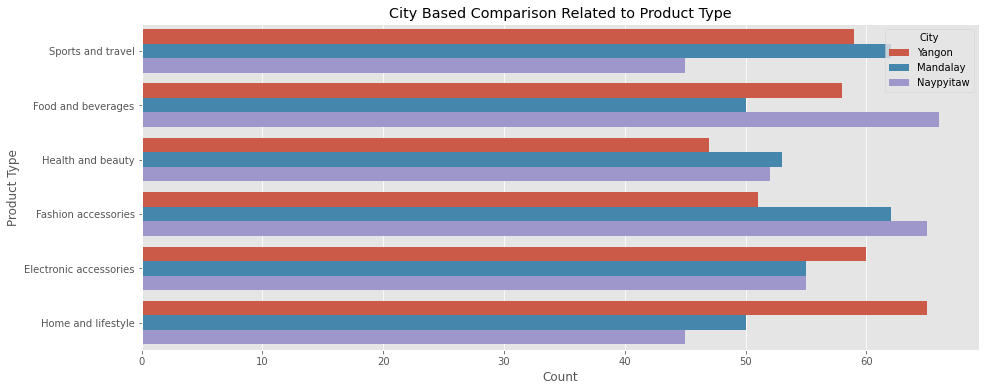

In [184]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=df, y='Product line', hue="City", ax=ax) 
ax.set_xlabel("Count")
ax.set_ylabel("Product Type")
plt.title("City Based Comparison Related to Product Type")
plt.show()

- Yangon leads at Home and Lifestyle and Electronic accessories
- Mandalay leads at Sports and Travel and Health & Beauty
- Naypyitaw leads at Food and Bevaerages and Fashion accessories

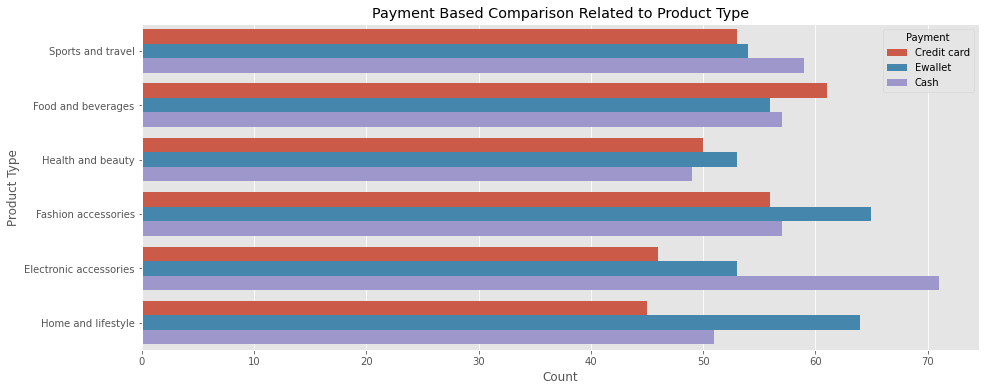

In [185]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=df, y="Product line", hue="Payment", ax=ax) 
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.title("Payment Based Comparison Related to Product Type")
plt.show()

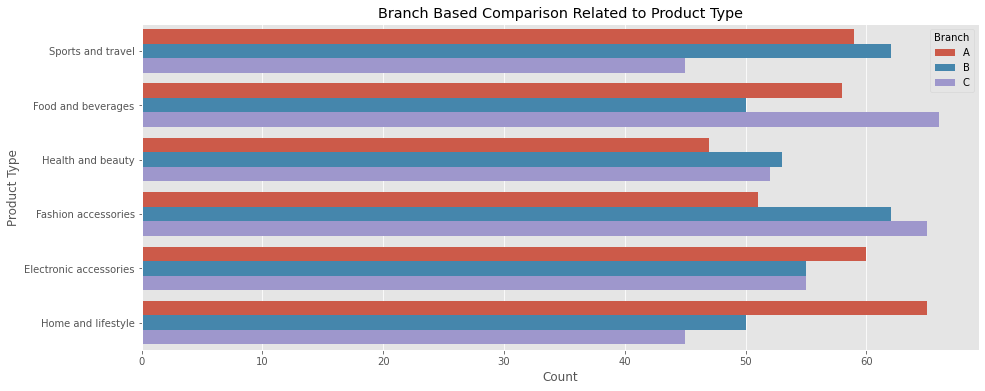

In [186]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=df, y="Product line", hue="Branch", ax=ax) 
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.title("Branch Based Comparison Related to Product Type")
plt.show()

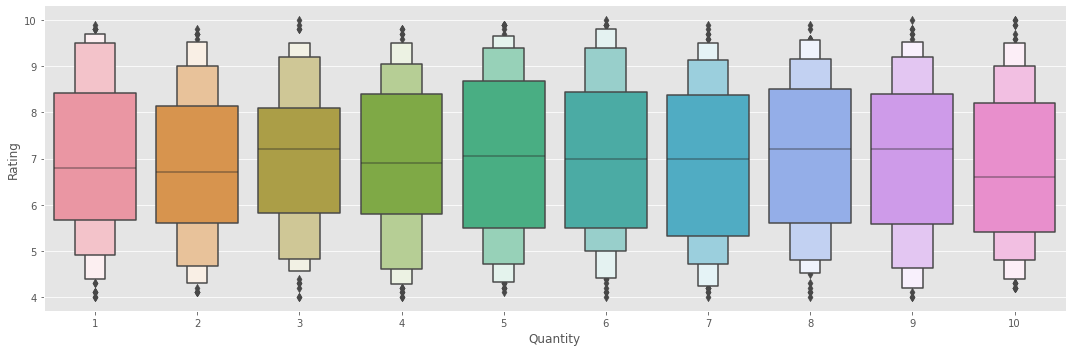

In [187]:
sns.catplot(data=df, y="Rating", x="Quantity", kind='boxen', aspect=3) 
plt.xlabel("Quantity")
plt.ylabel("Rating")
plt.show()